In [1]:
%matplotlib inline

In [2]:
##############################################################
#                                                            #
#    Mark Hoogendoorn and Burkhardt Funk (2017)              #
#    Machine Learning for the Quantified Self                #
#    Springer                                                #
#    Chapter 7                                               #
#                                                            #
##############################################################

from util.VisualizeDataset import VisualizeDataset
from Chapter7.PrepareDatasetForLearning import PrepareDatasetForLearning
from Chapter7.LearningAlgorithms import ClassificationAlgorithms
from Chapter7.LearningAlgorithms import RegressionAlgorithms
from Chapter7.Evaluation import ClassificationEvaluation
from Chapter7.Evaluation import RegressionEvaluation
from Chapter7.FeatureSelection import FeatureSelectionClassification
from Chapter7.FeatureSelection import FeatureSelectionRegression
import copy
import pandas as pd
from util import util
import matplotlib.pyplot as plot
import numpy as np
from sklearn.model_selection import train_test_split
import os

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python2.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### Chapter 7 Exercise 1

In [3]:
######
# Load the dataset
######

DataViz = VisualizeDataset()

# Read the result from the previous chapter, and make sure the index is of the type datetime.

dataset_path = './intermediate_datafiles/'
export_tree_path = 'Example_graphs/Chapter7/'

try:
    dataset = pd.read_csv(dataset_path + 'chapter5_result.csv', index_col=0)
except IOError as e:
    print('File not found, try to run previous crowdsignals scripts first!')
    raise e

if not os.path.exists(export_tree_path):
    os.makedirs(export_tree_path)

dataset.index = dataset.index.to_datetime()
prepare = PrepareDatasetForLearning()

In [6]:
######
# This method does the actual classification
######
def perform_classification():
    print 'Training set length is: ', len(train_X.index)
    print 'Test set length is: ', len(test_X.index)

    # Select subsets of the features that we will consider:

    basic_features = ['acc_phone_x','acc_phone_y','acc_phone_z','acc_watch_x','acc_watch_y','acc_watch_z','gyr_phone_x','gyr_phone_y','gyr_phone_z','gyr_watch_x','gyr_watch_y','gyr_watch_z',
                      'hr_watch_rate', 'light_phone_lux','mag_phone_x','mag_phone_y','mag_phone_z','mag_watch_x','mag_watch_y','mag_watch_z','press_phone_pressure']
    pca_features = ['pca_1','pca_2','pca_3','pca_4','pca_5','pca_6','pca_7']
    time_features = [name for name in dataset.columns if '_temp_' in name]
    freq_features = [name for name in dataset.columns if (('_freq' in name) or ('_pse' in name))]
    print '#basic features: ', len(basic_features)
    print '#PCA features: ', len(pca_features)
    print '#time features: ', len(time_features)
    print '#frequency features: ', len(freq_features)
    cluster_features = ['cluster']
    print '#cluster features: ', len(cluster_features)
    features_after_chapter_3 = list(set().union(basic_features, pca_features))
    features_after_chapter_4 = list(set().union(basic_features, pca_features, time_features, freq_features))
    features_after_chapter_5 = list(set().union(basic_features, pca_features, time_features, freq_features, cluster_features))


    # First, let us consider the performance over a selection of features:

#     fs = FeatureSelectionClassification()

#     features, ordered_features, ordered_scores = fs.forward_selection(1, train_X[features_after_chapter_5], train_y)
#     print "ordered scores: ", ordered_scores
#     print "ordered features: ", ordered_features

#     plot.plot(range(1, 51), ordered_scores)
#     plot.xlabel('number of features')
#     plot.ylabel('accuracy')
#     plot.show()

    # Based on the plot we select the top 10 features.

    selected_features = ['acc_phone_y_freq_0.0_Hz_ws_40', 'press_phone_pressure_temp_mean_ws_120', 'gyr_phone_x_temp_std_ws_120',
                         'mag_watch_y_pse', 'mag_phone_z_max_freq', 'gyr_watch_y_freq_weighted', 'gyr_phone_y_freq_1.0_Hz_ws_40',
                         'acc_phone_x_freq_1.9_Hz_ws_40', 'mag_watch_z_freq_0.9_Hz_ws_40', 'acc_watch_y_freq_0.5_Hz_ws_40']

    # Let us first study the impact of regularization and model complexity: does regularization prevent overfitting?

    learner = ClassificationAlgorithms()
    eval = ClassificationEvaluation()

    reg_parameters = [0.0001, 0.001, 0.01, 0.1, 1, 10]
    performance_training = []
    performance_test = []

    # We repeat the experiment a number of times to get a bit more robust data as the initialization of the NN is random.

#     repeats = 20

#     for reg_param in reg_parameters:
#         performance_tr = 0
#         performance_te = 0
#         for i in range(0, repeats):
#             class_train_y, class_test_y, class_train_prob_y, class_test_prob_y = learner.feedforward_neural_network(train_X, train_y,
#                                                                                                                 test_X, hidden_layer_sizes=(250, ), alpha=reg_param, max_iter=500,
#                                                                                                                 gridsearch=False)
#             performance_tr += eval.accuracy(train_y, class_train_y)
#             performance_te += eval.accuracy(test_y, class_test_y)
#         performance_training.append(performance_tr/repeats)
#         performance_test.append(performance_te/repeats)

#     plot.hold(True)
#     plot.semilogx(reg_parameters, performance_training, 'r-')
#     plot.semilogx(reg_parameters, performance_test, 'b:')
#     print "performance_training: ", performance_training
#     print "performance_test: ", performance_test
#     plot.xlabel('regularization parameter value')
#     plot.ylabel('accuracy')
#     plot.ylim([0.95, 1.01])
#     plot.legend(['training', 'test'], loc=4)
#     plot.hold(False)

#     plot.show()

    # Second, let us consider the influence of certain parameter settings (very related to the regulariztion) and study the impact on performance.

#     leaf_settings = [1,2,5,10]
#     performance_training = []
#     performance_test = []

#     for no_points_leaf in leaf_settings:
#         class_train_y, class_test_y, class_train_prob_y, class_test_prob_y = learner.decision_tree(train_X[selected_features], train_y, test_X[selected_features], min_samples_leaf=no_points_leaf,
#                                                                                                    gridsearch=False, print_model_details=False)
#         performance_training.append(eval.accuracy(train_y, class_train_y))
#         performance_test.append(eval.accuracy(test_y, class_test_y))

#     plot.hold(True)
#     plot.plot(leaf_settings, performance_training, 'r-')
#     plot.plot(leaf_settings, performance_test, 'b:')
#     plot.xlabel('minimum number of points per leaf')
#     plot.ylabel('accuracy')
#     plot.legend(['training', 'test'], loc=1)
#     plot.hold(False)

#     plot.show()


    # So yes, it is important :) Therefore we perform grid searches over the most important parameters, and do so by means
    # of cross validation upon the training set.


    possible_feature_sets = [basic_features, features_after_chapter_3, features_after_chapter_4, features_after_chapter_5, selected_features]
    feature_names = ['initial set']#, 'Chapter 3', 'Chapter 4', 'Chapter 5', 'Selected features']
    repeats = 2

    scores_over_all_algs = []

    for i in range(1): #0, len(possible_feature_sets)):
        selected_train_X = train_X[possible_feature_sets[i]]
        selected_test_X = test_X[possible_feature_sets[i]]

        # First we run our non deterministic classifiers a number of times to average their score.

        performance_tr_nn = 0
        performance_tr_rf = 0
        performance_tr_svm = 0
        performance_te_nn = 0
        performance_te_rf = 0
        performance_te_svm = 0

        for repeat in range(0, repeats):
            class_train_y, class_test_y, class_train_prob_y, class_test_prob_y = learner.feedforward_neural_network(selected_train_X, train_y, selected_test_X, gridsearch=True)
            performance_tr_nn += eval.accuracy(train_y, class_train_y)
            performance_te_nn += eval.accuracy(test_y, class_test_y)

            class_train_y, class_test_y, class_train_prob_y, class_test_prob_y = learner.random_forest(selected_train_X, train_y, selected_test_X, gridsearch=True)
            performance_tr_rf += eval.accuracy(train_y, class_train_y)
            performance_te_rf += eval.accuracy(test_y, class_test_y)

            class_train_y, class_test_y, class_train_prob_y, class_test_prob_y = learner.support_vector_machine_with_kernel(selected_train_X, train_y, selected_test_X, gridsearch=True)
            performance_tr_svm += eval.accuracy(train_y, class_train_y)
            performance_te_svm += eval.accuracy(test_y, class_test_y)


        overall_performance_tr_nn = performance_tr_nn/repeats
        overall_performance_te_nn = performance_te_nn/repeats
        overall_performance_tr_rf = performance_tr_rf/repeats
        overall_performance_te_rf = performance_te_rf/repeats
        overall_performance_tr_svm = performance_tr_svm/repeats
        overall_performance_te_svm = performance_te_svm/repeats

        # And we run our deterministic classifiers:


        class_train_y, class_test_y, class_train_prob_y, class_test_prob_y = learner.k_nearest_neighbor(selected_train_X, train_y, selected_test_X, gridsearch=True)
        performance_tr_knn = eval.accuracy(train_y, class_train_y)
        performance_te_knn = eval.accuracy(test_y, class_test_y)

        class_train_y, class_test_y, class_train_prob_y, class_test_prob_y = learner.decision_tree(selected_train_X, train_y, selected_test_X, gridsearch=True)
        performance_tr_dt = eval.accuracy(train_y, class_train_y)
        performance_te_dt = eval.accuracy(test_y, class_test_y)

        class_train_y, class_test_y, class_train_prob_y, class_test_prob_y = learner.naive_bayes(selected_train_X, train_y, selected_test_X)
        performance_tr_nb = eval.accuracy(train_y, class_train_y)
        performance_te_nb = eval.accuracy(test_y, class_test_y)

        scores_with_sd = util.print_table_row_performances(feature_names[i], len(selected_train_X.index), len(selected_test_X.index), [
                                                                                                    (overall_performance_tr_nn, overall_performance_te_nn),
                                                                                                    (overall_performance_tr_rf, overall_performance_te_rf),
                                                                                                    (overall_performance_tr_svm, overall_performance_te_svm),
                                                                                                    (performance_tr_knn, performance_te_knn),
                                                                                                    (performance_tr_dt, performance_te_dt),
                                                                                                    (performance_tr_nb, performance_te_nb)])
        scores_over_all_algs.append(scores_with_sd)
        break

    DataViz.plot_performances_classification(['NN', 'RF', 'SVM', 'KNN', 'DT', 'NB'], feature_names, scores_over_all_algs)

    # And we study two promising ones in more detail. First let us consider the decision tree which works best with the selected
    # features.
    #
    class_train_y, class_test_y, class_train_prob_y, class_test_prob_y = learner.decision_tree(train_X[selected_features], train_y, test_X[selected_features],
                                                                                               gridsearch=True,
                                                                                               print_model_details=True, export_tree_path=export_tree_path)

    class_train_y, class_test_y, class_train_prob_y, class_test_prob_y = learner.random_forest(train_X[selected_features], train_y, test_X[selected_features],
                                                                                               gridsearch=True, print_model_details=True)

    test_cm = eval.confusion_matrix(test_y, class_test_y, class_train_prob_y.columns)

    DataViz.plot_confusion_matrix(test_cm, class_train_prob_y.columns, normalize=False)

Training set length is:  1285
Test set length is:  552
#basic features:  21
#PCA features:  7
#time features:  56
#frequency features:  432
#cluster features:  1
initial set  &  0.9887 \emph{( 0.9828 - 0.9946 )}  &  0.9674 \emph{( 0.9523 - 0.9825 )}  &  0.9988 \emph{( 0.9969 - 1.0007 )}  &  0.9647 \emph{( 0.9490 - 0.9804 )}  &  1.0000 \emph{( 1.0000 - 1.0000 )}  &  0.9710 \emph{( 0.9567 - 0.9853 )}  &  1.0000 \emph{( 1.0000 - 1.0000 )}  &  0.9728 \emph{( 0.9590 - 0.9867 )}  &  0.9891 \emph{( 0.9833 - 0.9949 )}  &  0.9275 \emph{( 0.9055 - 0.9496 )}  &  0.9300 \emph{( 0.9157 - 0.9442 )}  &  0.9130 \emph{( 0.8891 - 0.9370 )} \\\hline


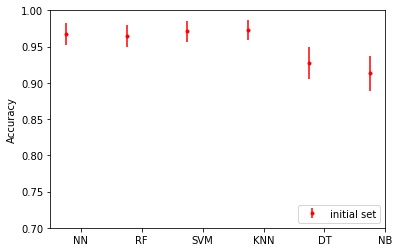

{'criterion': 'entropy', 'min_samples_leaf': 2}
Feature importance decision tree:
gyr_phone_x_temp_std_ws_120  &  0.34450175961018276
acc_phone_y_freq_0.0_Hz_ws_40  &  0.3319606101526454
press_phone_pressure_temp_mean_ws_120  &  0.29572343093773074
mag_watch_y_pse  &  0.01920232095676459
mag_phone_z_max_freq  &  0.004330376248118412
mag_watch_z_freq_0.9_Hz_ws_40  &  0.002467650254737879
acc_phone_x_freq_1.9_Hz_ws_40  &  0.001813851839820356
gyr_watch_y_freq_weighted  &  0.0
gyr_phone_y_freq_1.0_Hz_ws_40  &  0.0
acc_watch_y_freq_0.5_Hz_ws_40  &  0.0
{'n_estimators': 50, 'criterion': 'gini', 'min_samples_leaf': 2}
Feature importance random forest:
gyr_phone_x_temp_std_ws_120  &  0.2593024136577508
acc_phone_y_freq_0.0_Hz_ws_40  &  0.2564245556864026
press_phone_pressure_temp_mean_ws_120  &  0.22411628864050936
mag_watch_y_pse  &  0.0932307380889989
mag_phone_z_max_freq  &  0.03846473818267054
acc_phone_x_freq_1.9_Hz_ws_40  &  0.037694194597101986
gyr_phone_y_freq_1.0_Hz_ws_40  &  0.03672

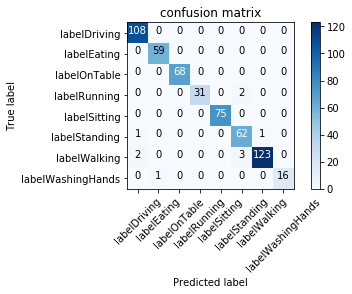

In [7]:
######
# Run the classifier on the dataset without multiple labels or unknowns.
######

train_X, test_X, train_y, test_y = prepare.split_single_dataset_classification(dataset, ['label'], 'like', 0.7, filter=True, temporal=False)
perform_classification()



In [ ]:
######
# Run the classifier on the dataset that does have multiple labels and unknowns.
######

train_X, test_X, train_y, test_y = prepare.split_single_dataset_classification(dataset, ['label'], 'like', 0.7, filter=False, temporal=False)
perform_classification()

Training set length is:  2026
Test set length is:  869
#basic features:  21
#PCA features:  7
#time features:  56
#frequency features:  432
#cluster features:  1
